# Table of contents

1 Introduction
2 Preparation
3 Glimpse of Data
4 Most Popular Sector
5 Most Popular Activity for taking loans
6 Most Popular Use of loans
7 Distribution of the Funded Loan amount
7.1 Distribution of the Funded Loan amount by Country
7.2 Summary of Funded Amount
7.3 Distribution of the Funded Loan amount by Sector
7.4 Distribution of loans by Gender
8 Most common Term In Months in loans
9 Most Popular Countries for loans
10 Maps of Loans
11 Themes Loan combined
12 Most Popular Theme
13 Africa
13.1 Distribution of loans in Africa
13.2 African Conflicts Data
13.2.1 Battle affected Countries
13.2.2 Loans in Battle affected Countries
13.3 Use of loans in Africa
13.4 Most Popular Sector in Africa
13.5 Distribution of the Funded Loan amount in Africa
13.6 Summary of Funded Amount in Africa
14 Asia
14.1 Distribution of loans in Asia
14.2 Poorest Asian Countries from Multidimensional Poverty Measures
14.3 Explore the loans in the Poorest Asian countries
14.4 Use of loans in Asia
14.5 Most Popular Sector in Asia
14.6 Distribution of the Funded Loan amount in Asia
14.7 Summary of Funded Amount in Asia
15 Americas
15.1 Distribution of loans in Americas
15.2 Poorest South American Countries from Multidimensional Poverty Measures
15.3 Explore the loans in the Poorest South American countries
15.4 Use of loans in Americas
15.5 Most Popular Sector in America
15.6 Distribution of the Funded Loan amount in America
15.7 Summary of Funded Amount in America
16 Philippines
17 Kenya
18 El Salvador
19 India

25 Kenya Demographic and Health Survey analysis
25.1 Asset Indicator distribution
25.2 Asset Indicator and MPI
25.3 Distribution Asset Inidcator
25.4 Travel Times and MPI
25.5 NightLights Distribution
25.6 Number of DHS Clusters
25.7 Modelling
25.7.1 Prediction variable
25.7.2 Columns for modelling
25.7.3 XGBoost
25.7.4 The Model Details

# Pre-Overview of Data

## Importing libraries

In [11]:
# importing library
import pandas as pd
import numpy as np
import pandas_profiling
import missingno as msno

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import os
from subprocess import check_output
import scipy


## Importing data

In [12]:
print(check_output(['ls', '../Kiva_founding']).decode('utf8'))

kiva_loans.csv
kiva_mpi_region_locations.csv
kiva_note_1.ipynb
loan_theme_ids.csv
loan_themes_by_region.csv



In [13]:
# main data
kiva_loans = pd.read_csv('kiva_loans.csv')

# data of MPI
kiva_index = pd.read_csv('kiva_mpi_region_locations.csv')

# data of partners
kiva_partners = pd.read_csv('loan_themes_by_region.csv')

# Data Summary

## Kiva Loans


Questions:
- Most Popular Sector
- Most Popular Activity for taking loans
- Most Popular Use of loans
- Distribution of the Funded Loan amount
- Distribution of the Funded Loan amount by Country
- Summary of Funded Amount
- Distribution of the Funded Loan amount by Sector
- Distribution of loans by Gender
- Most common Term In Months in loans
- Most Popular Countries for loans
- Maps of Loans
- Themes Loan combined
- Most Popular Theme

Hypothesis:

In [15]:
kiva_loans.sample(1)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
492184,1152287,1350.0,1350.0,Personal Housing Expenses,Housing,to repair the roof deck of his house after a h...,UA,Ukraine,Vinogradovo,UAH,26.0,2016-09-18 11:27:00+00:00,2016-08-26 07:00:00+00:00,2016-10-06 09:35:30+00:00,26.0,45,"#Repeat Borrower, user_favorite, #Parent, #Rep...",male,monthly,2016-09-18


In [16]:
kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666973 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null object
disbursed_time        668809 non-null object
funded_time           622874 non-null object
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  499789 non-null object
borrower_genders      666984 non-null object
repayment_interval    671205 non-null object
date                  671205 non

In [33]:
kiva_loans.dtypes.unique().tolist()

[dtype('int64'), dtype('float64'), dtype('O')]

In [18]:
pandas_profiling.ProfileReport(kiva_loans.iloc[:, 1:7])

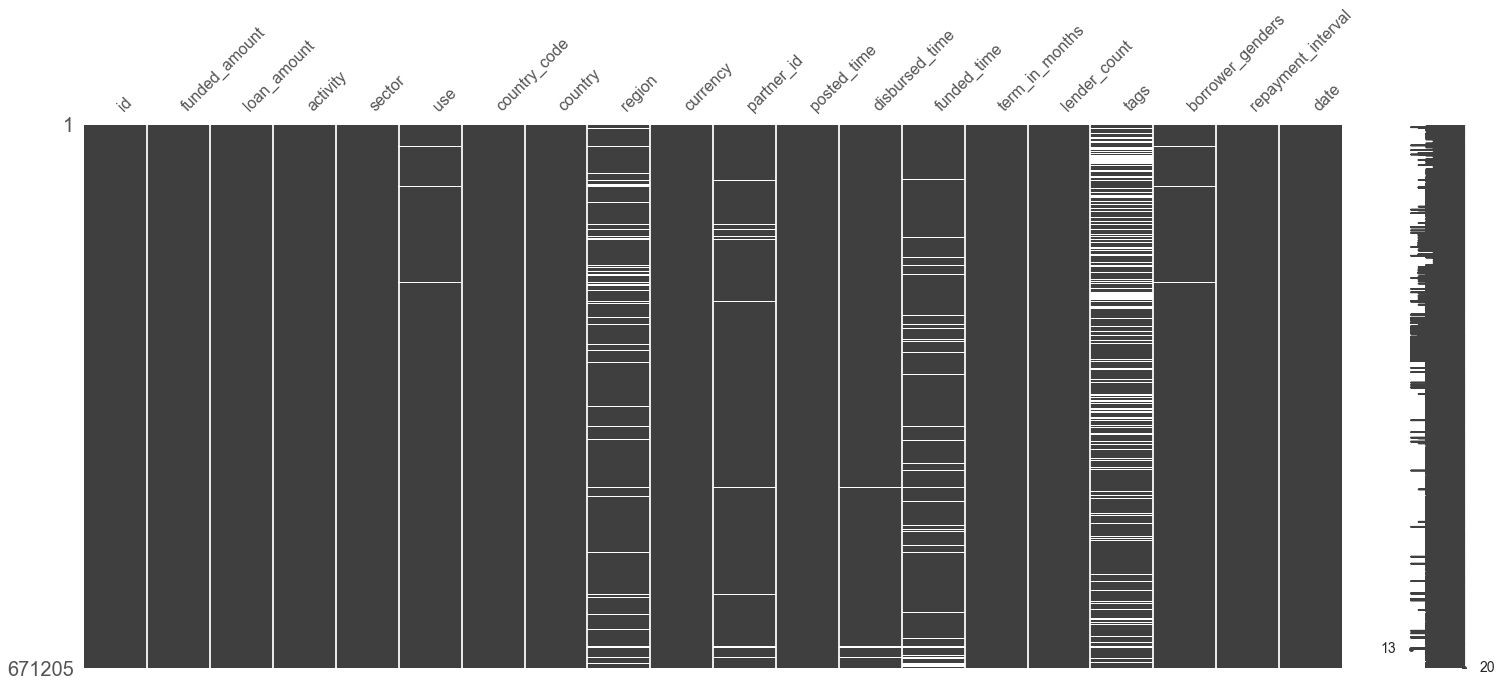

In [19]:
# missing files
msno.matrix(kiva_loans)

In [14]:
data_missing = round(kiva_loans.isnull().sum()/len(kiva_loans), 3)
missing_perc = pd.DataFrame({'feature':data_missing.index, 'perc_nan':data_missing.values})

In [15]:
# multiplying by 100
missing_perc.iloc[:, 1] = missing_perc.iloc[:, 1].apply(lambda x: round(x*100, 2))

In [16]:
# filtering by missing percentage more than 2%
missing_perc[missing_perc['perc_nan']>=2].sort_values('perc_nan', ascending=False)

,feature,perc_nan
16,tags,25.5
8,region,8.5
13,funded_time,7.2
10,partner_id,2.0


## Borrower Gender

In [171]:
kiva_loans.borrower_genders.str.split()[0]

True

In [170]:
# Aggregating by sector
sector = kiva_loans.groupby('sector').sum()

### Plotting loan by sector

In [98]:
# sector[['loan_amount']].T
sector

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
sector,,,,,,
Agriculture,179541433427,133770635.0,143067875.0,32915351.0,2584539.0,3808678
Arts,12354423449,11821055.0,12240325.0,2246451.0,160464.0,326292
Clothing,32177476208,34805270.0,37300925.0,5548155.0,395856.0,807904
Construction,6101424471,6321515.0,6695150.0,1057829.0,96343.0,173348
Education,30829140605,30044920.0,30968525.0,5059666.0,671144.0,909788
Entertainment,836708881,1023095.0,1389150.0,106434.0,14201.0,26363
Food,134810052348,115089210.0,121606150.0,21842372.0,1587061.0,2714474
Health,9577358772,9172250.0,9843400.0,1648238.0,176833.0,268264
Housing,32735636877,21377100.0,23663950.0,5671973.0,692258.0,649879


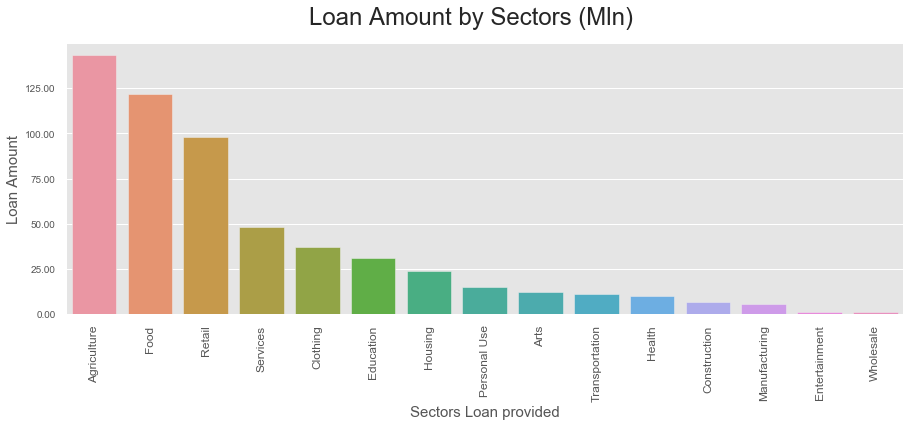

In [89]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(15, 5))
# sorting sector loans
sector.sort_values('loan_amount', ascending=False, inplace=True)


sns.barplot(x=sector.index, y=sector.loan_amount.values, log=False)
plt.xticks(rotation=90, fontsize=12)
fig.suptitle("Loan Amount by Sectors (Mln)", fontsize = 24)
ax.set_xlabel('Sectors Loan provided', fontsize=15)
ax.set_ylabel('Loan Amount', fontsize=15)

x = sector.loan_amount.values
y = sector.loan_amount.values

# change range of number on y-axis
ax.yaxis.set_ticks(np.arange(0, 150000000, 25000000))
# formatting numbers on yaxis
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, y: '%3.2f' % (x * 1e-6)))

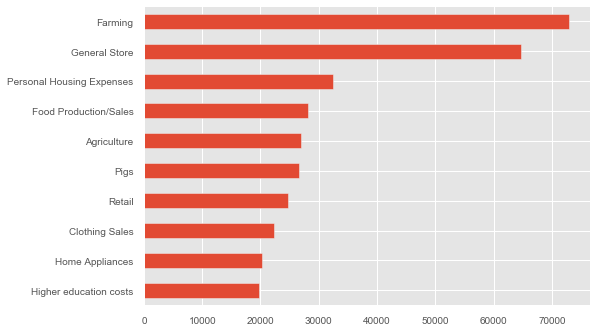

In [90]:
# Popular Activity
activity = kiva_loans.activity.value_counts().nlargest(10).sort_values()
activity.plot(kind='barh')

In [112]:
kiva_loans_usage.use.value_counts()
# print(kiva_loans_usage.iloc[:, 1].value_counts())

to buy a water filter to provide safe drinking water for their family.                         5217
to buy a water filter to provide safe drinking water for her family.                           4082
To buy a water filter to provide safe drinking water for their family.                         2141
to build a sanitary toilet for her family.                                                     1708
to build a sanitary toilet for her family                                                      1599
                                                                                               ... 
to buy shampoo, candies, chocolate and canned goods to supply the demands of the customers.       1
to bear the expenses of her son's graduate degree education.                                      1
 To buy more sugar, rice, soaps and lotions to sell                                               1
to construct more classrooms and to repair the school's building.                                 1


In [101]:
# Popular Use
# TOdo cleaning data
kiva_loans_usage = kiva_loans[['use']].copy()

drink_water = ['to buy a water filter to provide safe drinking water for their family.', 'to buy a water filter to provide safe drinking water for her family.', 'To buy a water filter to provide safe drinking water for their family.', 'to buy a water filter to provide safe drinking water for his family.']
sanitary = ['to build a sanitary toilet for her family.', 'to build a sanitary toilet for her family']
farm = ['to buy feed and other supplies to raise her pigs.', 'to buy fertilizers and other farm supplies.']
business = ['to buy ingredients for her food production business', 'to purchase more groceries to sell.']

def usage_loan(x):
    """Return purpose of loan usage"""
    empty = ''
    
    if x in drink_water:
        return 'Water Supply for family'
    elif x in sanitary:
        return 'Sanitary for family'
    elif x in business:
        return 'For Business Purpose'
    elif x in farm:
        return 'For Farm'
    else:
        return empty
    
kiva_loans_usage['use_2'] = kiva_loans_usage['use'].apply(usage_loan)
    

In [182]:
# Borrower Gender
kiva_loans.borrower_genders.isnull()
# todo cleaning data

0         False
1         False
2         False
3         False
4         False
          ...  
671200    False
671201    False
671202     True
671203    False
671204    False
Name: borrower_genders, Length: 671205, dtype: bool

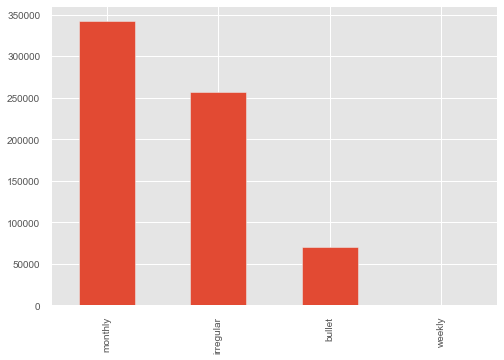

In [172]:
# Payment interval
kiva_loans.repayment_interval.value_counts().nlargest(10).plot(kind='bar')

## Loan Distribution by year

In [138]:
# creating year column
kiva_loans.posted_time = pd.to_datetime(kiva_loans.posted_time)
kiva_loans['year'] = kiva_loans.posted_time.dt.year
year_count = kiva_loans.groupby('year').count()
year_sum = kiva_loans.groupby('year').sum()

In [149]:
year_sum

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
year,,,,,,
2014,130811141849,146716070.0,152924550.0,26750972.0,2496540.0,4148389
2015,166731406658,148329465.0,157622925.0,30546659.0,2490327.0,3904401
2016,218916680839,151512605.0,164434750.0,36994681.0,2688853.0,3888264
2017,150214193011,81005675.0,90438925.0,22909219.0,1545980.0,1879676


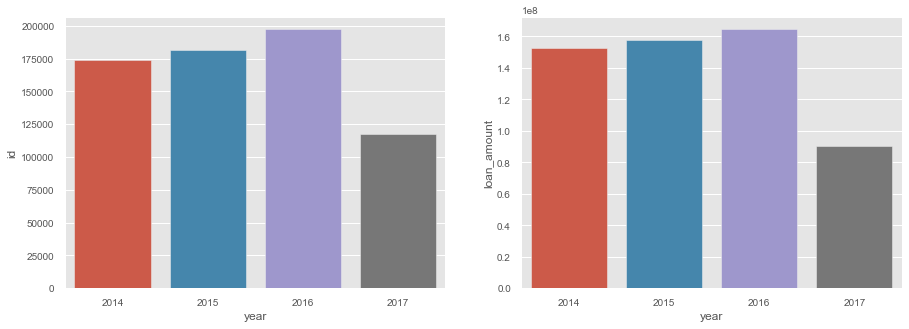

In [163]:
# Plotting barcharts
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# ploting count by year
sns.barplot(x=year_count.index, y='id', data=year_count, ax=ax[0])

# plotting loans sum by year
sns.barplot(x=year_sum.index, y='loan_amount', data=year_sum, ax=ax[1])

# Data by country and continent

In [80]:
countries_loan = kiva_loans.groupby('country')['loan_amount'].sum().sort_values(ascending=False)

In [79]:
countries_loan
East_Asia = []
Central_asia= []
North_America = []
South_America = []
Europe = []



Index(['Philippines', 'Kenya', 'United States', 'Peru', 'Paraguay',
       'El Salvador', 'Cambodia', 'Bolivia', 'Rwanda', 'Uganda', 'Tajikistan',
       'Ecuador', 'Vietnam', 'Colombia', 'Pakistan', 'Palestine', 'Armenia',
       'Lebanon', 'Guatemala', 'The Democratic Republic of the Congo',
       'Nicaragua', 'Mexico', 'Mali', 'Kyrgyzstan', 'Senegal', 'Tanzania',
       'India', 'Samoa', 'Honduras', 'Ghana', 'Indonesia', 'Jordan',
       'Sierra Leone', 'Georgia', 'Zimbabwe', 'Myanmar (Burma)',
       'Burkina Faso', 'Azerbaijan', 'Haiti', 'Burundi', 'Albania', 'Iraq',
       'Timor-Leste', 'Nigeria', 'Costa Rica', 'Dominican Republic',
       'Mozambique', 'Kosovo', 'Yemen', 'Mongolia', 'Malawi', 'Ukraine',
       'Togo', 'Madagascar', 'Zambia', 'Liberia',
       'Lao People's Democratic Republic', 'Egypt', 'Cameroon', 'Congo',
       'Turkey', 'Israel', 'Moldova', 'Brazil', 'South Africa', 'Suriname',
       'Benin', 'Solomon Islands', 'Thailand', 'China', 'Puerto Rico',
       '

In [83]:
kiva_loans.pivot_table(index='sector', columns='country', values='loan_amount', aggfunc=np.sum)

country,Afghanistan,Albania,Armenia,Azerbaijan,Belize,Benin,Bhutan,Bolivia,Brazil,Burkina Faso,...,Turkey,Uganda,Ukraine,United States,Vanuatu,Vietnam,Virgin Islands,Yemen,Zambia,Zimbabwe
sector,,,,,,,,,,,,,,,,,,,,,
Agriculture,NaN,1005350.0,7587550.0,1664075.0,114025.0,50375.0,NaN,2210800.0,32625.0,628750.0,...,6200.0,3609350.0,421125.0,2999050.0,NaN,5143900.0,NaN,75700.0,103075.0,832200.0
Arts,14000.0,8375.0,63225.0,8450.0,NaN,300.0,20000.0,958975.0,30925.0,47950.0,...,165000.0,98550.0,NaN,1351500.0,NaN,11400.0,NaN,4075.0,NaN,22400.0
Clothing,NaN,162050.0,360025.0,56225.0,NaN,7625.0,NaN,2332200.0,112400.0,372900.0,...,65075.0,942650.0,360625.0,1957925.0,NaN,242175.0,NaN,136800.0,1250.0,831725.0
Construction,NaN,37975.0,162475.0,70900.0,NaN,NaN,NaN,303300.0,31925.0,8950.0,...,NaN,220150.0,11275.0,435900.0,NaN,113125.0,NaN,102750.0,NaN,24050.0
Education,NaN,118025.0,1592575.0,56300.0,NaN,NaN,NaN,505225.0,NaN,NaN,...,2450.0,1889875.0,NaN,870125.0,NaN,1287950.0,NaN,3500.0,109925.0,40500.0
Entertainment,NaN,5225.0,18675.0,NaN,NaN,NaN,NaN,41425.0,NaN,NaN,...,NaN,20150.0,NaN,776725.0,NaN,12950.0,NaN,NaN,NaN,NaN
Food,NaN,123400.0,523000.0,401125.0,NaN,187150.0,NaN,6174700.0,97625.0,1239650.0,...,106175.0,3287375.0,87475.0,7209975.0,NaN,2921150.0,NaN,253525.0,61225.0,567225.0
Health,NaN,342550.0,1088575.0,92050.0,NaN,NaN,NaN,747850.0,3550.0,1825.0,...,16925.0,206525.0,450.0,396450.0,NaN,115150.0,NaN,32925.0,9400.0,6700.0
Housing,NaN,500900.0,52125.0,55675.0,NaN,NaN,NaN,507425.0,NaN,NaN,...,700.0,756800.0,353025.0,242850.0,NaN,3147650.0,NaN,333275.0,NaN,NaN


# Poverty information by country

## Table of contents

In [ ]:
20 Multidimensional Poverty Measures
20.1 MPI Rural
20.2 MPI Urban
20.3 MPI Map
20.4 MPI Countries and Kiva Loans
20.5 Use of loans and MPI
20.6 Sectors of loans and MPI
20.7 Distribution of the Funded Loan amount
20.8 Poorest Regions
21 Human Development Index
21.1 Human Development Index Map
22 Population below Poverty Line
22.1 Population under Poverty Line Map
23 Most Dominant Field Partner
24 Naive Poverty Metric
24.1 Distribution of the Naive Poverty Metric
24.2 Poorest Countries based on Naive Poverty Metric

# Partner Information